In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [30]:
df = pd.read_csv('../data/adult.csv')
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.set_index('Index', inplace=True)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

def salary_to_category(salary):
    return '<=50K' if salary <= 50 else '>50K'

df['calculated_category'] = df['salary K$'].apply(salary_to_category)
mask = df['salary'] != df['calculated_category']
df.loc[mask, 'salary'] = df.loc[mask, 'calculated_category']
df.drop(columns='calculated_category', inplace=True)
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
Index,,,,,,,,,,,,
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40


# Task 1
Print the count of men and women in the dataset.

In [44]:
df['sex'].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [51]:
men_df = df[df['sex'] == 'Male']
men_df['age'].mean()

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [64]:
ppl_from_pl = len(df[df['native-country'] == 'Poland'])
total_ppl = len(df)
percentage_from_pl = (ppl_from_pl / total_ppl) * 100
round(percentage_from_pl, 3)

0.186

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [71]:
high_earners = df[df['salary'] == '>50K']
mean_age_high_earners = high_earners['age'].mean()
std_age_high_earners = high_earners['age'].std()

low_earners = df[df['salary'] == '<=50K']
mean_age_low_earners = low_earners['age'].mean()
std_age_low_earners = low_earners['age'].std()
mean_age_high_earners, std_age_high_earners, mean_age_low_earners, std_age_low_earners

(np.float64(43.95911028236548),
 np.float64(10.269632835673852),
 np.float64(36.60806038668668),
 np.float64(13.464631257161633))

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [77]:
high_education_levels = ['Bachelors', 'Prof-school', 'Assoc-voc', 'Masters', 'Doctorate']
high_earners_without_edu = high_earners[~high_earners['education'].isin(high_education_levels)]
high_earners_without_edu

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
Index,,,,,,,,,,,,
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K,122


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [83]:
df.groupby('education')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [102]:
married_men = men_df[men_df['marital-status'].str.startswith('Married')]
not_married_men = men_df[~men_df['marital-status'].str.startswith('Married')]
married_men['salary K$'].mean(), not_married_men['salary K$'].mean()

(np.float64(107.49455968688845), np.float64(46.59723865877712))

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [109]:
hours_count = df['hours-per-week'].value_counts()
max_hours_per_week = df['hours-per-week'].max()
num_of_pll_with_max_hours = hours_count[max_hours_per_week]
num_of_pll_with_max_hours

np.int64(78)

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

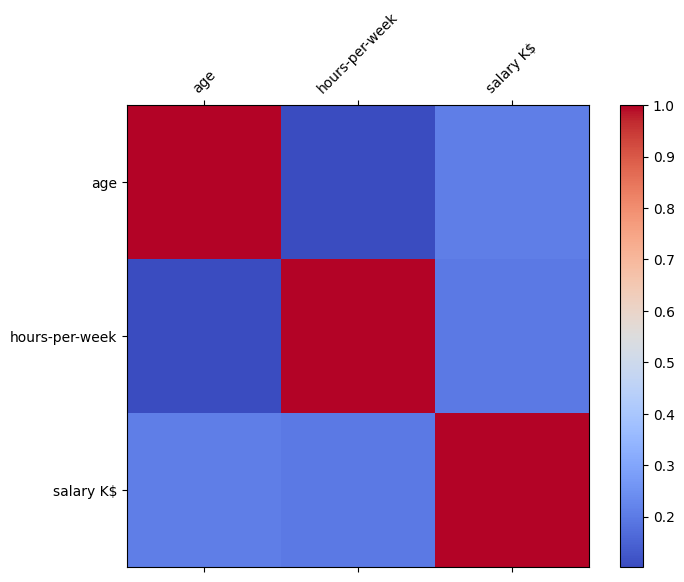

In [115]:
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.matshow(corr_matrix, cmap='coolwarm')

plt.colorbar(cax)

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45)
ax.set_yticklabels(corr_matrix.columns)

plt.show()